In [1]:
import os
import kagglehub
import warnings
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from classifier import CNNClassifier

from tools import evaluate_model, plot_confusion_matrix, generate_gradcam, get_image
from datasets import get_manjilkarki_deep_fake_real_dataset, get_xhlulu_140k_real_and_fake_dataset, get_alaaeddineayadi_real_vs_fake_dataset

Evaluation of a model trained on https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces

Model: _faces-weights-gan.pth_

### Images preprocessing

In [2]:
HEIGHT, WIDTH = 128, 128

transform = transforms.Compose([
    transforms.Resize((HEIGHT, WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# Suppress all warnings
warnings.filterwarnings("ignore")

### Load dataset

In [3]:
_, _, test_dataset = get_xhlulu_140k_real_and_fake_dataset(transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

classes = {0: 'fake', 1: 'real'}

### CNN Model

In [4]:
# Instantiate the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNClassifier(im_size=HEIGHT, num_of_classes=2).to(device)

Con1 size: 126
MaxPool1 size: 63
Con2 size: 58
MaxPool2 size: 29
Con3 size: 24
MaxPool3 size: 12


### Load model

In [5]:
state_dict = torch.load("faces-weights-gan.pth", map_location=device)
model.load_state_dict(state_dict)

<All keys matched successfully>

tensor([1])
tensor([1])
tensor([1])
tensor([1])
tensor([1])


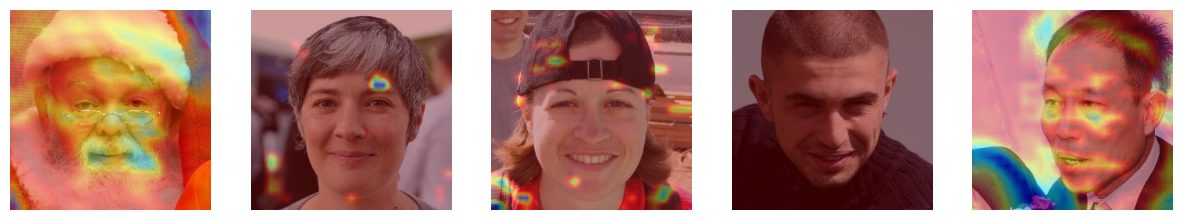

In [6]:
start_index = 4
num_of_images = 5

images_subset = map(lambda i: test_dataset.get_image_path(i), range(start_index, start_index + num_of_images))
images_subset = list(images_subset)

heatmaps = list(map(
    lambda im_data: generate_gradcam(model=model, img=im_data[0], img_tensor=im_data[1], target_layer=model.conv3),
    [get_image(i, transform) for i in images_subset])
)

plt.figure(figsize=(15, 5))

for i, h_map in enumerate(heatmaps):
    plt.subplot(1, num_of_images, i + 1)
    plt.imshow(h_map)
    plt.axis("off")
plt.show()

In [16]:
test_dataset[0]

(tensor([[[ 0.9922,  0.9922,  0.9922,  ..., -0.1059, -0.0902, -0.0902],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.0745, -0.0745, -0.0745],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.0510, -0.0353, -0.0353],
          ...,
          [-0.9294, -0.9373, -0.9451,  ..., -0.9373, -0.9373, -0.9373],
          [-0.9294, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
          [-0.9373, -0.9373, -0.9373,  ..., -0.9451, -0.9451, -0.9373]],
 
         [[ 1.0000,  1.0000,  1.0000,  ..., -0.1686, -0.1529, -0.1529],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.1451, -0.1373, -0.1373],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.1373, -0.1216, -0.1216],
          ...,
          [-0.9294, -0.9373, -0.9451,  ..., -0.9373, -0.9373, -0.9373],
          [-0.9294, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
          [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9294, -0.9373]],
 
         [[ 1.0000,  1.0000,  1.0000,  ..., -0.3176, -0.3020, -0.3020],
          [ 1.0000,  1.0000,

### Evaluation

Test dataset from data used for training

Test accuracy: 94.645
AUC: 0.946


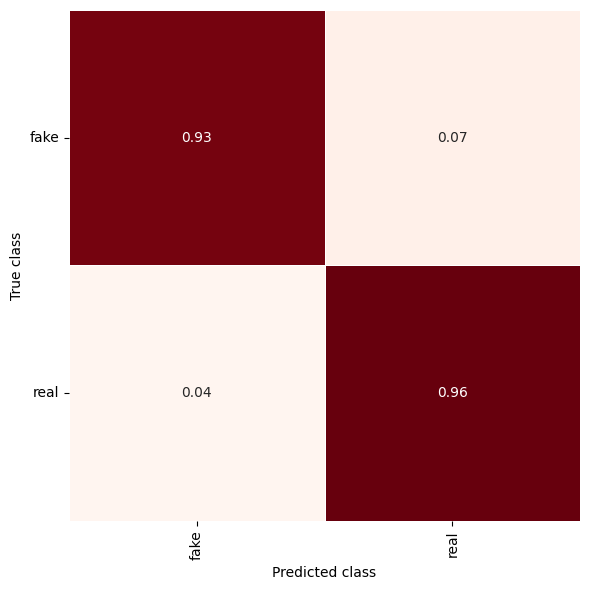

In [7]:
plot_confusion_matrix(evaluate_model(model, test_loader, device, classes), classes)

### deepfake and real images dataset

https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images

In [8]:
_, _, test_dataset = get_manjilkarki_deep_fake_real_dataset(transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

Test accuracy: 49.546
AUC: 0.499


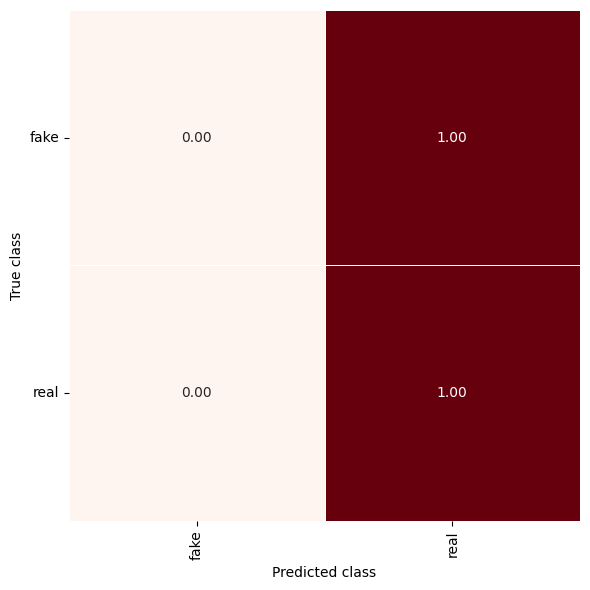

In [9]:
plot_confusion_matrix(evaluate_model(model, test_loader, device, classes), classes)

Some random dataset from Kaggle

Test accuracy: 89.344
AUC: 0.871


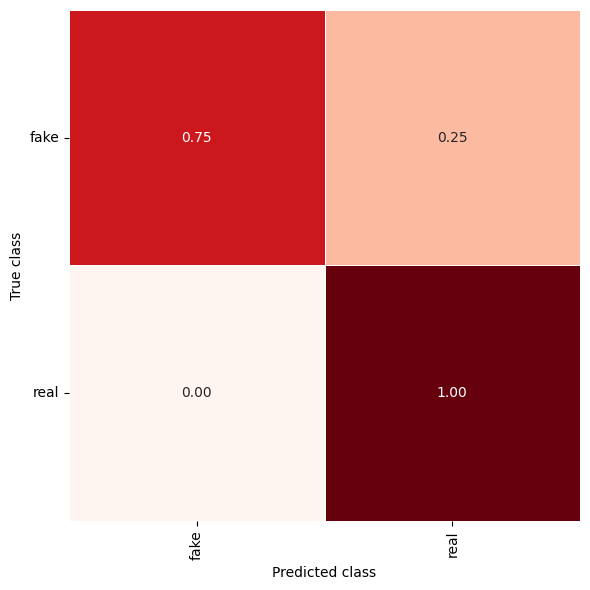

In [10]:
_, _, test_dataset = get_alaaeddineayadi_real_vs_fake_dataset(transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)
plot_confusion_matrix(evaluate_model(model, test_loader, device, classes), classes)